In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
dataset = pd.read_csv('bq-results-20200919-185108-j5k2kxtg2dbr.csv',
                     dtype={"country_region_code": str,
                            "country_region": str,
                            "sub_region_1": str,
                            "sub_region_2": str,
                            "iso_3166_2_code": str,
                            "census_fips_code": str,
                            "retail_and_recreation_percent_change_from_baseline": float,
                            "grocery_and_pharmacy_percent_change_from_baseline": float,
                            "parks_percent_change_from_baseline": float,
                            "transit_stations_percent_change_from_baseline": float,
                            "workplaces_percent_change_from_baseline": float,
                            "residential_percent_change_from_baseline": float},
                     parse_dates=['date'])

In [44]:
dataset_EU = pd.read_csv('EU Dataset.csv',
                     dtype={"country_region_code": str,
                            "country_region": str,
                            "sub_region_1": str,
                            "sub_region_2": str,
                            "iso_3166_2_code": str,
                            "census_fips_code": str,
                            "retail_and_recreation_percent_change_from_baseline": float,
                            "grocery_and_pharmacy_percent_change_from_baseline": float,
                            "parks_percent_change_from_baseline": float,
                            "transit_stations_percent_change_from_baseline": float,
                            "workplaces_percent_change_from_baseline": float,
                            "residential_percent_change_from_baseline": float},
                     parse_dates=['date'])

In [45]:
dataset_EU.equals(dataset)

True

In [41]:
dataset.dtypes

country_region_code                                           object
country_region                                                object
sub_region_1                                                  object
sub_region_2                                                  object
iso_3166_2_code                                               object
census_fips_code                                              object
date                                                  datetime64[ns]
retail_and_recreation_percent_change_from_baseline           float64
grocery_and_pharmacy_percent_change_from_baseline            float64
parks_percent_change_from_baseline                           float64
transit_stations_percent_change_from_baseline                float64
workplaces_percent_change_from_baseline                      float64
residential_percent_change_from_baseline                     float64
dtype: object

In [42]:
dataset.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-15,1.0,6.0,-2.0,-1.0,2.0,1.0
1,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-16,-2.0,5.0,2.0,-2.0,2.0,1.0
2,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-17,-3.0,2.0,4.0,-3.0,2.0,1.0
3,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-18,-3.0,2.0,1.0,-2.0,2.0,1.0
4,AE,United Arab Emirates,Abu Dhabi,NaN,AE-AZ,NaN,2020-02-19,-3.0,1.0,0.0,-1.0,2.0,1.0


In [105]:
def country_trends(country):
    subset = dataset[(dataset['country_region_code'] == country) &
                     pd.isna(dataset['sub_region_1'])].set_index('date')
    subset['retail_and_recreation_percent_change_from_baseline'] = subset['retail_and_recreation_percent_change_from_baseline'].rolling(window=7).mean()
    subset['grocery_and_pharmacy_percent_change_from_baseline'] = subset['grocery_and_pharmacy_percent_change_from_baseline'].rolling(window=7).mean()
    subset['parks_percent_change_from_baseline'] = subset['parks_percent_change_from_baseline'].rolling(window=7).mean()
    subset['transit_stations_percent_change_from_baseline'] = subset['transit_stations_percent_change_from_baseline'].rolling(window=7).mean()
    subset['workplaces_percent_change_from_baseline'] = subset['workplaces_percent_change_from_baseline'].rolling(window=7).mean()
    subset['residential_percent_change_from_baseline'] = subset['residential_percent_change_from_baseline'].rolling(window=7).mean()
    subset = subset.drop(columns=['country_region_code', 'country_region', 'sub_region_1',
                         'sub_region_2', 'iso_3166_2_code', 'census_fips_code'])
    subset.plot(figsize=(10,5))

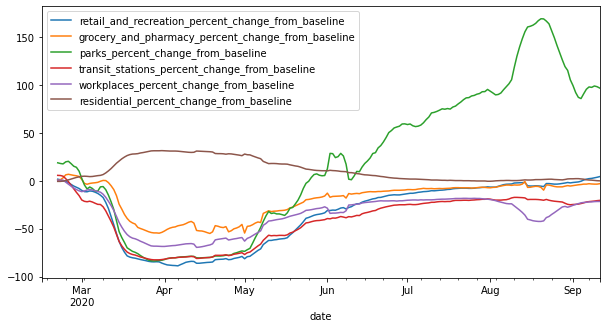

In [106]:
country_trends('IT')